# Preparation and cleaning of the dataset

In [1]:
#Mount Drive and install dependencies if running in Colab
from sys import path
import os
import sys

if 'google.colab' in str(get_ipython()):
  from google.colab import drive

  root_PATH = '/content/drive/My Drive/nlp-seminar/repository'
  drive_mount_location = '/content/drive'
  module_path = root_PATH + '/src'
  
  drive.mount(drive_mount_location, force_remount=True)
  path.append(root_PATH)

else:
  root_PATH = os.path.abspath("../../")
  module_path = os.path.abspath(os.path.join('../../src'))

%load_ext autoreload
%autoreload 2

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from data_processor import DataProcessor

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Notebook Configuration Variables

In [3]:
#Configuration variables

#Remove topics with less than this number of samples
underrepresented_threshold = 4000

## Dataset Preparation

In [4]:
#Load dataset
data_df = pd.read_csv(root_PATH + '/data/data.csv')

#Lowercase columns to make them PEP 8 compliant
data_df.columns = map(str.lower, data_df.columns)

#Convert the topic column into a list
data_df["topic"] = data_df["topic"].apply(eval)

#Generate boolean mask
boolean_mask = DataProcessor.obtain_boolean_mask_from_dataset(data_df)

#Remove underrepresented topics
underrepresented_topics = DataProcessor.get_underrepresented_topics(data_df,underrepresented_threshold)
data_df, remaining_topics = DataProcessor.remove_topics_from_dataset(data_df,boolean_mask,underrepresented_topics)

## Split Dataset into train, validation and test set

In [5]:
train_df, rest_df = train_test_split(data_df, test_size=0.3,shuffle = True)
validation_df,test_df = train_test_split(rest_df,test_size=0.5,shuffle = True)

## Analyze Splits to confirm that the distribution is preserved

In [6]:
train_topic_counts = DataProcessor.get_column_indexes(train_df["topic"])
train_topic_counts = train_topic_counts[train_topic_counts.index.isin(remaining_topics)]

validation_topic_counts = DataProcessor.get_column_indexes(validation_df["topic"])
validation_topic_counts = validation_topic_counts[validation_topic_counts.index.isin(remaining_topics)]

test_topic_counts = DataProcessor.get_column_indexes(test_df["topic"])
test_topic_counts = test_topic_counts[test_topic_counts.index.isin(remaining_topics)]

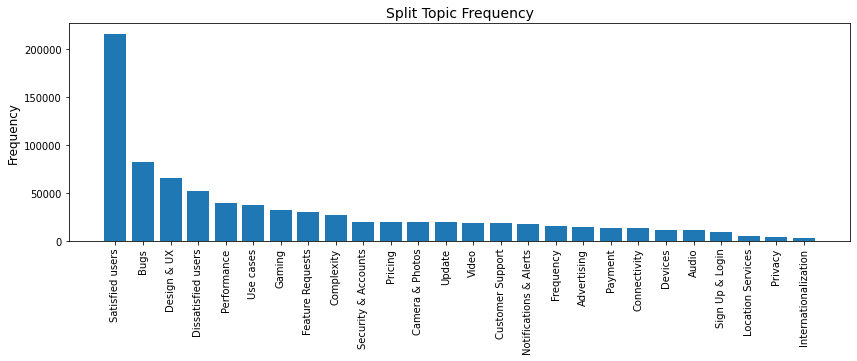

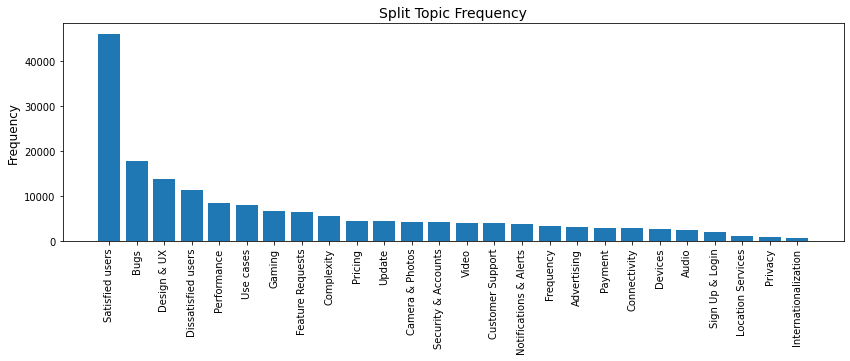

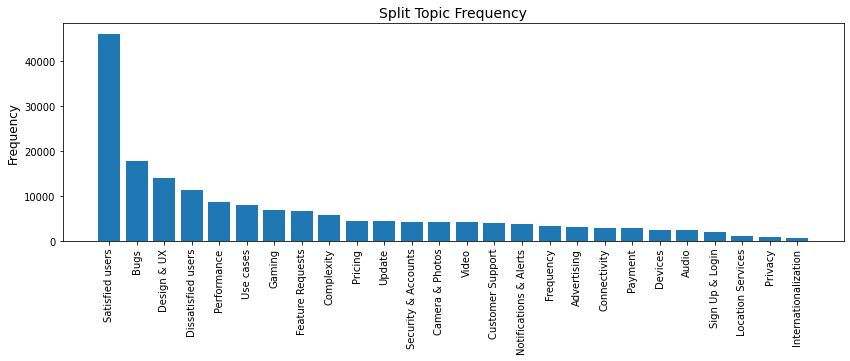

In [7]:
def plot_topics(topic_counts):
    fig, ax = plt.subplots(figsize = (14,4))
    ax.bar(topic_counts.index,
            topic_counts.values)
    ax.set_ylabel("Frequency", size = 12)
    ax.set_title("Split Topic Frequency", size = 14)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

plot_topics(train_topic_counts)
plot_topics(validation_topic_counts)
plot_topics(test_topic_counts)

## Save Splits

In [8]:
train_df.to_csv(root_PATH + '/data/train.csv', index=False)
validation_df.to_csv(root_PATH + '/data/validation.csv', index=False)
test_df.to_csv(root_PATH + '/data/test.csv', index=False)